In [14]:
import numpy as np
import scipy.linalg as la
import hamiltonian as hm
%matplotlib inline
import matplotlib.pyplot as plt
from random import gauss

# Old Method

In [18]:
L = 5
dense = True
if (dense):
    fix = 'dense'
else:
    fix = 'sparse'

In [19]:
if (dense):
    H = hm.dense_H(L)
    fix = 'dense'
else:
    H = hm.sparse_H(L)
    fix = 'sparse'
# vals, vecs = la.eigh(H)

In [20]:
Z = np.zeros((2**L,2**L))
for i in range(L):
    Zi = 1
    for j in range(L):
        if (j==i): Zi = np.kron(Zi,hm.Z)
        else: Zi = np.kron(Zi,hm.I)
    Z += Zi

X = np.zeros((2**L,2**L))
for i in range(L):
    Xi = 1
    for j in range(L):
        if (j==i): Xi = np.kron(Xi,hm.X)
        else: Xi = np.kron(Xi,hm.I)
    X += Xi

Y = np.zeros((2**L,2**L), dtype=complex)
for i in range(L):
    Yi = 1
    for j in range(L):
        if (j==i): Yi = np.kron(Yi,hm.Y)
        else: Yi = np.kron(Yi,hm.I)
    Y += Yi
    
# print(Z@Z)
# vals, vecs = la.eigh(Z)
# print(vals)
    
S2 = X@X + Y@Y + Z@Z
# vals2, _ = la.eigh(S2)
# print(hm.chop(S2))
# print(hm.chop(vals2))
# print(hm.chop(np.sqrt(vals2+1)-1)/2)

In [21]:
Hsmal = hm.mat2list(H)[(int)(L/2)]
Zsmal = hm.mat2list(Z)[(int)(L/2)]
Ssmal = hm.mat2list(S2)[(int)(L/2)]

In [86]:
# # eigs of Hsmal
# valsH, vecsH = la.eigh(Hsmal)
# for i, vec in enumerate(vecsH.T):
# #     a = (H@vec)
# #     a = a[np.absolute(vec) > .0001]
# #     a = a/vec[np.absolute(vec) > .0001]
# #     if np.all(np.isclose(a[0], a)): print("H:", a[0])
# #     else: print("not an eig of H")
# #     print("should be", valsH[i], '\n')
#     a = (vec.conj()@Hsmal@vec)
#     print(i, "H:", hm.chop(a), " should be", hm.chop(valsH[i]))

In [87]:
# # expectations of S2 in eigs of Hsmal
# valsH, vecsH = la.eigh(Hsmal)
# Ss = []
# for i, vec in enumerate(vecsH.T):
#     a = (Ssmal@vec)
#     a = a[np.absolute(vec) > .0001]
#     a = a/vec[np.absolute(vec) > .0001]
#     if np.all(np.isclose(a[0], a)): 
#         print(i, "S:", hm.chop(a[0]), hm.chop(vec.conj()@Ssmal@vec))
#         Ss.append(a[0])
#     else: 
#         print(str(i) + " is not an eig of S", a[0], vec[np.absolute(vec) > .0001][np.argmax(np.absolute(a - a[0]))])
# #         Ss.append(None)
# #     print("should be", valsX[i], '\n')
# #     a = (vec.conj()@Zsmal@vec)
# #     print("z:", a)

In [88]:
# # eigs of Ssmal
# valsS, vecsS = la.eigh(Ssmal)
# for i, vec in enumerate(vecsS.T):
# #     a = (H@vec)
# #     a = a[np.absolute(vec) > .0001]
# #     a = a/vec[np.absolute(vec) > .0001]
# #     if np.all(np.isclose(a[0], a)): print("H:", a[0])
# #     else: print("not an eig of H")
# #     print("should be", valsH[i], '\n')
#     a = (vec.conj()@Ssmal@vec)
#     print("S:", hm.chop(a))
# #     print(str(i) + " should be", valsH[i], '\n')

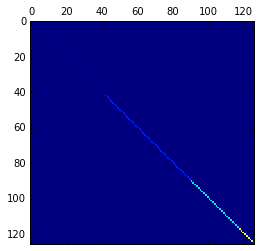

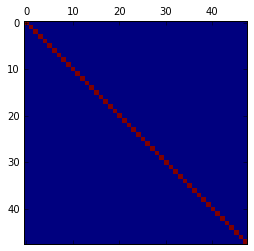

In [16]:
valsS, vecsS = la.eigh(Ssmal)
Sdiag = vecsS.conj().T@Ssmal@vecsS
# print(np.absolute(Sdiag))
plt.matshow(np.absolute(Sdiag))
plt.show()
vals = np.round(valsS).astype('int')
counts = np.bincount(vals)
mask = (vals == np.argmax(counts))
plt.matshow(np.absolute(Sdiag)[mask][:,mask])
plt.show()

In [17]:
Htiny = (vecsS.conj().T@Hsmal@vecsS)[mask][:,mask]
valsH, vecsH = la.eigh(Htiny)
print(hm.chop(valsH))
print(valsH)

[-8.986 -7.869 -6.335 -5.907 -5.432 -5.263 -4.657 -4.362 -4.203 -3.62  -3.44
 -3.054 -2.734 -2.625 -2.298 -1.594 -1.406 -1.236 -0.915 -0.595 -0.494
 -0.291 -0.167 -0.011  0.011  0.167  0.291  0.494  0.595  0.915  1.236
  1.406  1.594  2.298  2.625  2.734  3.054  3.44   3.62   4.203  4.362
  4.657  5.263  5.432  5.907  6.335  7.869  8.986]
[-8.98641816 -7.86879741 -6.33451142 -5.90688383 -5.43234725 -5.26346836
 -4.6566959  -4.36235966 -4.20258493 -3.61960348 -3.44017486 -3.05371431
 -2.73436839 -2.62505438 -2.29766099 -1.5939273  -1.40580594 -1.23648368
 -0.91528964 -0.59480805 -0.49369375 -0.29052309 -0.16713518 -0.01122377
  0.01122377  0.16713518  0.29052309  0.49369375  0.59480805  0.91528964
  1.23648368  1.40580594  1.5939273   2.29766099  2.62505438  2.73436839
  3.05371431  3.44017486  3.61960348  4.20258493  4.36235966  4.6566959
  5.26346836  5.43234725  5.90688383  6.33451142  7.86879741  8.98641816]


In [92]:
valsH = valsH[valsH > 1e-10]
delta = (valsH - np.roll(valsH, 1))[1:]
stats = np.minimum(delta, np.roll(delta, 1)) / np.maximum(delta, np.roll(delta, 1)) 

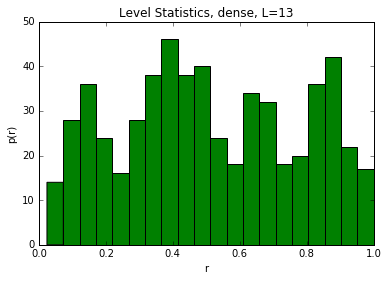

In [71]:
n, bins, patches = plt.hist(stats, 20, facecolor='green')
plt.xlabel('r')
plt.ylabel('p(r)')
plt.title("Level Statistics, " + fix + ", L=" + str(L))
plt.savefig("figures/level_stats_" + fix + "L" + str(L) + ".pdf")

In [59]:
np.save('data/level_stats_' + fix + "L" + str(L), stats)

# Breaking Degeneracies
### Use Ising Term

In [2]:
def ising_mult(l):
    if (l==1): return np.zeros((2,2))
    if (l==2): return np.matmul(np.kron(hm.Z,hm.I), np.kron(hm.I, hm.Z))
    return (np.kron(ising_mult(l-1), np.eye(2)) + 
            np.kron(np.eye(2**(l-2)), np.matmul(np.kron(hm.Z,hm.I), np.kron(hm.I, hm.Z))))

In [3]:
L = 11
dense = True
if (dense):
    fix = 'dense'
else:
    fix = 'sparse'

In [4]:
if (dense):
    H = hm.dense_H(L)
    fix = 'dense'
else:
    H = hm.sparse_H(L)
    fix = 'sparse'
# vals, vecs = la.eigh(H)

In [5]:
Z = np.zeros((2**L,2**L))
for i in range(L):
    Zi = 1
    for j in range(L):
        if (j==i): Zi = np.kron(Zi,hm.Z)
        else: Zi = np.kron(Zi,hm.I)
    Z += Zi

X = np.zeros((2**L,2**L))
for i in range(L):
    Xi = 1
    for j in range(L):
        if (j==i): Xi = np.kron(Xi,hm.X)
        else: Xi = np.kron(Xi,hm.I)
    X += Xi

Y = np.zeros((2**L,2**L), dtype=complex)
for i in range(L):
    Yi = 1
    for j in range(L):
        if (j==i): Yi = np.kron(Yi,hm.Y)
        else: Yi = np.kron(Yi,hm.I)
    Y += Yi
    
# print(Z@Z)
# vals, vecs = la.eigh(Z)
# print(vals)
    
S2 = X@X + Y@Y + Z@Z
# vals2, _ = la.eigh(S2)
# print(hm.chop(S2))
# print(hm.chop(vals2))
# print(hm.chop(np.sqrt(vals2+1)-1)/2)

In [6]:
Hsmal = hm.mat2list(H)[(int)(L/2)]
Zsmal = hm.mat2list(Z)[(int)(L/2)]
Ssmal = hm.mat2list(S2)[(int)(L/2)]

In [7]:
valsH, vecsH = la.eigh(Hsmal)
# print(hm.chop(valsH))
# print(valsH)

In [8]:
hm.chop(valsH)

array([-11.641, -11.168, -10.622, -10.177, -10.106, -10.04 ,  -9.917,
        -9.834,  -9.557,  -9.5  ,  -9.442,  -9.413,  -8.899,  -8.549,
        -8.113,  -8.097,  -8.045,  -8.   ,  -7.758,  -7.727,  -7.716,
        -7.583,  -7.553,  -7.44 ,  -7.301,  -7.203,  -6.855,  -6.813,
        -6.686,  -6.618,  -6.46 ,  -6.451,  -6.438,  -6.399,  -6.355,
        -6.299,  -6.191,  -6.163,  -6.083,  -5.998,  -5.953,  -5.94 ,
        -5.939,  -5.93 ,  -5.856,  -5.807,  -5.787,  -5.777,  -5.741,
        -5.715,  -5.689,  -5.672,  -5.631,  -5.617,  -5.577,  -5.526,
        -5.481,  -5.448,  -5.421,  -5.392,  -5.262,  -5.255,  -5.217,
        -5.165,  -5.136,  -5.051,  -5.01 ,  -5.008,  -4.996,  -4.992,
        -4.876,  -4.854,  -4.79 ,  -4.732,  -4.714,  -4.645,  -4.585,
        -4.515,  -4.51 ,  -4.506,  -4.476,  -4.456,  -4.448,  -4.39 ,
        -4.381,  -4.312,  -4.295,  -4.271,  -4.243,  -4.201,  -4.155,
        -4.141,  -4.096,  -4.074,  -4.004,  -3.966,  -3.884,  -3.863,
        -3.808,  -3.

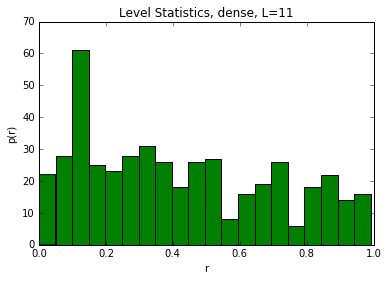

In [9]:
vals = valsH
# vals = valsH[valsH > 1e-10]
delta = (vals - np.roll(vals, 1))[1:]
stats = (np.minimum(delta, np.roll(delta, 1)) / np.maximum(delta, np.roll(delta, 1)))[1:]
n, bins, patches = plt.hist(stats, 20, facecolor='green')
plt.xlabel('r')
plt.ylabel('p(r)')
plt.title("Level Statistics, " + fix + ", L=" + str(L))
plt.show()
# plt.savefig("figures/level_stats_" + fix + "L" + str(L) + ".pdf")

In [10]:
ising_strength = -.1
H_ising = H + ising_strength * ising_mult(L)

In [11]:
Hsmal_i = hm.mat2list(H_ising)[(int)(L/2)]

In [12]:
valsH_i, vecsH = la.eigh(Hsmal_i)

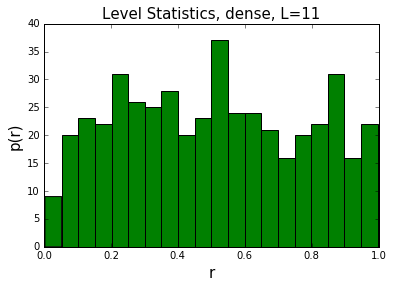

In [13]:
vals = valsH_i
# vals = valsH[valsH > 1e-10]
delta = (vals - np.roll(vals, 1))[1:]
stats = (np.minimum(delta, np.roll(delta, 1)) / np.maximum(delta, np.roll(delta, 1)))[1:]
n, bins, patches = plt.hist(stats, 20, facecolor='green')
plt.xlabel('r', fontsize=15)
plt.ylabel('p(r)', fontsize=15)
plt.title("Level Statistics, " + fix + ", L=" + str(L), fontsize=15)
plt.savefig("figures/level_stats_" + fix + "L" + str(L) + ".pdf")
plt.show()